In [170]:
%%javascript
<!-- Ignore this block -->
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [171]:
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

In [172]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import matplotlib

"""Set RC Params for matplotlib global"""
font = {'size'   : 16}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt

In [173]:
"""Splits the provided pandas dataframe into training and test dataset"""
def splitDataSet(inputDataframe, trainSetSize):
    
        trainSet = inputDataframe.sample(frac = trainSetSize)
        testSet = inputDataframe.drop(trainSet.index)
        trainSet.reset_index(inplace = True)
        testSet.reset_index(inplace = True)
        return trainSet, testSet

## Load Data

In [174]:
inputData = pd.read_csv("data/SMSSpamCollection", sep="\t", header=None)
inputData.columns = ['target', 'text']
inputData.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Encoding the target variables

In [175]:
encodingDictionary = {"spam":1,
                  "ham":0}

inputData['target'] = inputData.target.apply(lambda x: encodingDictionary[x])

## Split into train set and test set

In [176]:
trainSet, testSet = splitDataSet(inputData, 0.7)

In [177]:
yTrain = trainSet.target.values
xTrain = trainSet.text.values

yTest = testSet.target.values
xTest = testSet.text.values

# Train SVM model
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Svm_max_sep_hyperplane_with_margin.png/220px-Svm_max_sep_hyperplane_with_margin.png">

In [178]:
"""Load Stop words"""

with open("data/stopwords") as file:
    stopwordlist = file.readlines()

stopwordlist = [x.strip() for x in stopwordlist] 
stopwords = set(stopwordlist)

In [179]:
"""Define classification Pipeline"""

classificationPipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words = stopwords, lowercase = True, ngram_range=(1, 3))),
    ("classifier", SVC())
])

In [180]:
"""Define grid for performing grid search"""

parameterGrid = {
    "classifier__C":np.arange(0.5, 10, 0.5),
    "classifier__kernel":["rbf", "linear", "poly"],
    "classifier__verbose":[True]
}

In [181]:
"""Perform grid search"""

model = GridSearchCV(classificationPipeline, cv = 5, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

model.fit(xTrain, yTrain)

Fitting 5 folds for each of 57 candidates, totalling 285 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   29.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 285 out of 285 | elapsed:  2.5min finished


[LibSVM]

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=Tr...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'classifier__verbose': [True], 'classifier__C': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5]), 'classifier__kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

## Grid search results

In [182]:
scores = pd.DataFrame(model.cv_results_)
scores.head(57)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__C,param_classifier__kernel,param_classifier__verbose,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.711061,0.139033,0.860769,0.860769,0.5,rbf,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.012590,0.006935,0.000487,0.000122
1,1.790883,0.226583,0.971538,0.980000,0.5,linear,True,"{'classifier__verbose': True, 'classifier__C':...",19,0.964149,...,0.966667,0.981090,0.969191,0.979173,0.976893,0.980455,0.282296,0.029126,0.006298,0.000851
2,0.947077,0.151043,0.860769,0.860769,0.5,poly,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.247843,0.068128,0.000487,0.000122
3,0.975008,0.147338,0.860769,0.860769,1,rbf,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.318359,0.026425,0.000487,0.000122
4,1.840838,0.268362,0.981026,0.998141,1,linear,True,"{'classifier__verbose': True, 'classifier__C':...",18,0.975672,...,0.974359,0.997756,0.984596,0.998718,0.983312,0.998398,0.224594,0.064336,0.005084,0.000374
5,0.689648,0.104847,0.860769,0.860769,1,poly,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.115985,0.005294,0.000487,0.000122
6,0.661020,0.123867,0.860769,0.860769,1.5,rbf,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.011659,0.004092,0.000487,0.000122
7,1.440019,0.212651,0.981538,0.998974,1.5,linear,True,"{'classifier__verbose': True, 'classifier__C':...",9,0.979513,...,0.974359,0.998718,0.984596,0.999680,0.982028,0.998718,0.079734,0.059049,0.004411,0.000374
8,0.725927,0.113524,0.860769,0.860769,1.5,poly,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.093228,0.015012,0.000487,0.000122
9,0.682871,0.123375,0.860769,0.860769,2,rbf,True,"{'classifier__verbose': True, 'classifier__C':...",20,0.860435,...,0.860256,0.860897,0.861361,0.860622,0.861361,0.860622,0.028367,0.002813,0.000487,0.000122


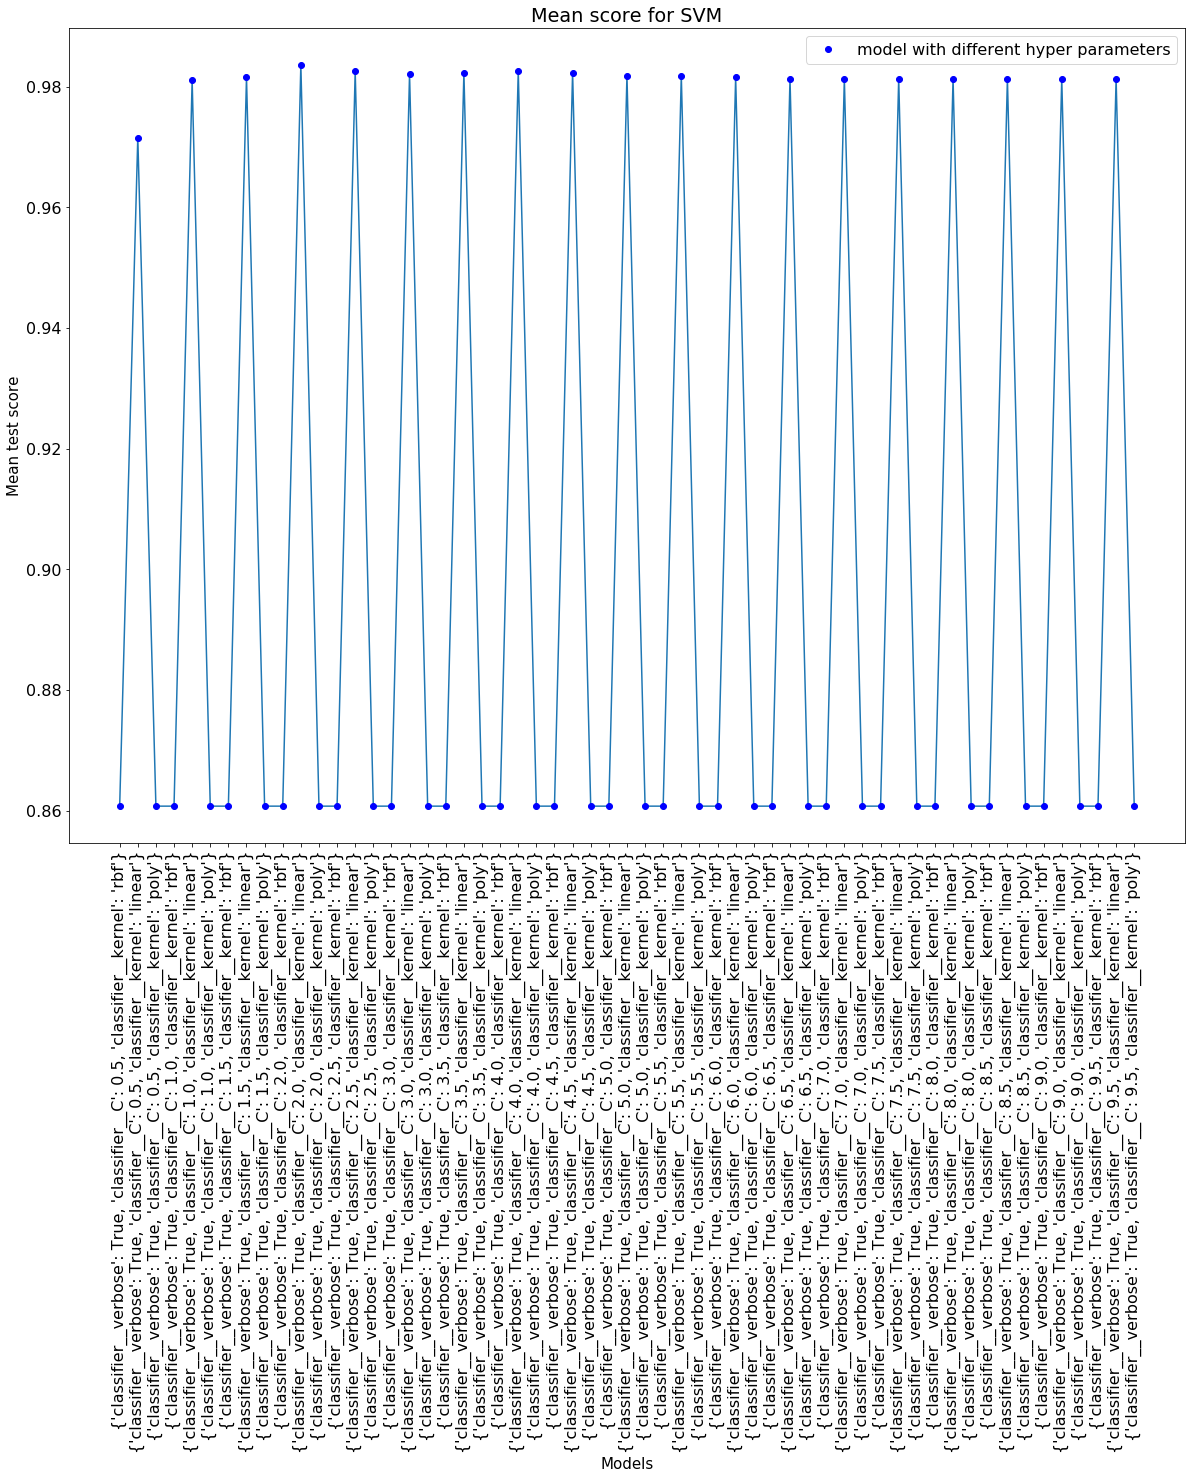

In [183]:
plt.figure(figsize = (20, 15))
plt.title("Mean score for SVM")
plt.plot(model.cv_results_["mean_test_score"])
plt.plot(model.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")


plt.xlabel('Models', fontsize = 15)
plt.ylabel('Mean test score', fontsize = 15)
plt.xticks(range(0, len(model.cv_results_['params'])), model.cv_results_['params'], rotation = 90)

plt.legend()
plt.show()

## Classification Report

In [184]:
prediction = model.predict(xTest)
print(classification_report(yTest, prediction, target_names=["ham", "spam"]))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1468
       spam       0.94      0.92      0.93       204

avg / total       0.98      0.98      0.98      1672



# Train model for AdaBoost classifier

In [185]:
classificationPipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(stop_words = stopwords, lowercase = True, ngram_range=(1, 3))),
    ("classifier", AdaBoostClassifier())
])

In [186]:
parameterGrid = {
    "classifier__n_estimators":range(50,100),
    "classifier__algorithm":["SAMME", "SAMME.R"]
}

In [187]:
modelBoosted = GridSearchCV(classificationPipeline, cv = 5, n_jobs = 3, param_grid = parameterGrid,
             verbose = 1, refit = True)

modelBoosted.fit(xTrain, yTrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.4s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.9min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=Tr...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'classifier__n_estimators': range(50, 100), 'classifier__algorithm': ['SAMME', 'SAMME.R']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

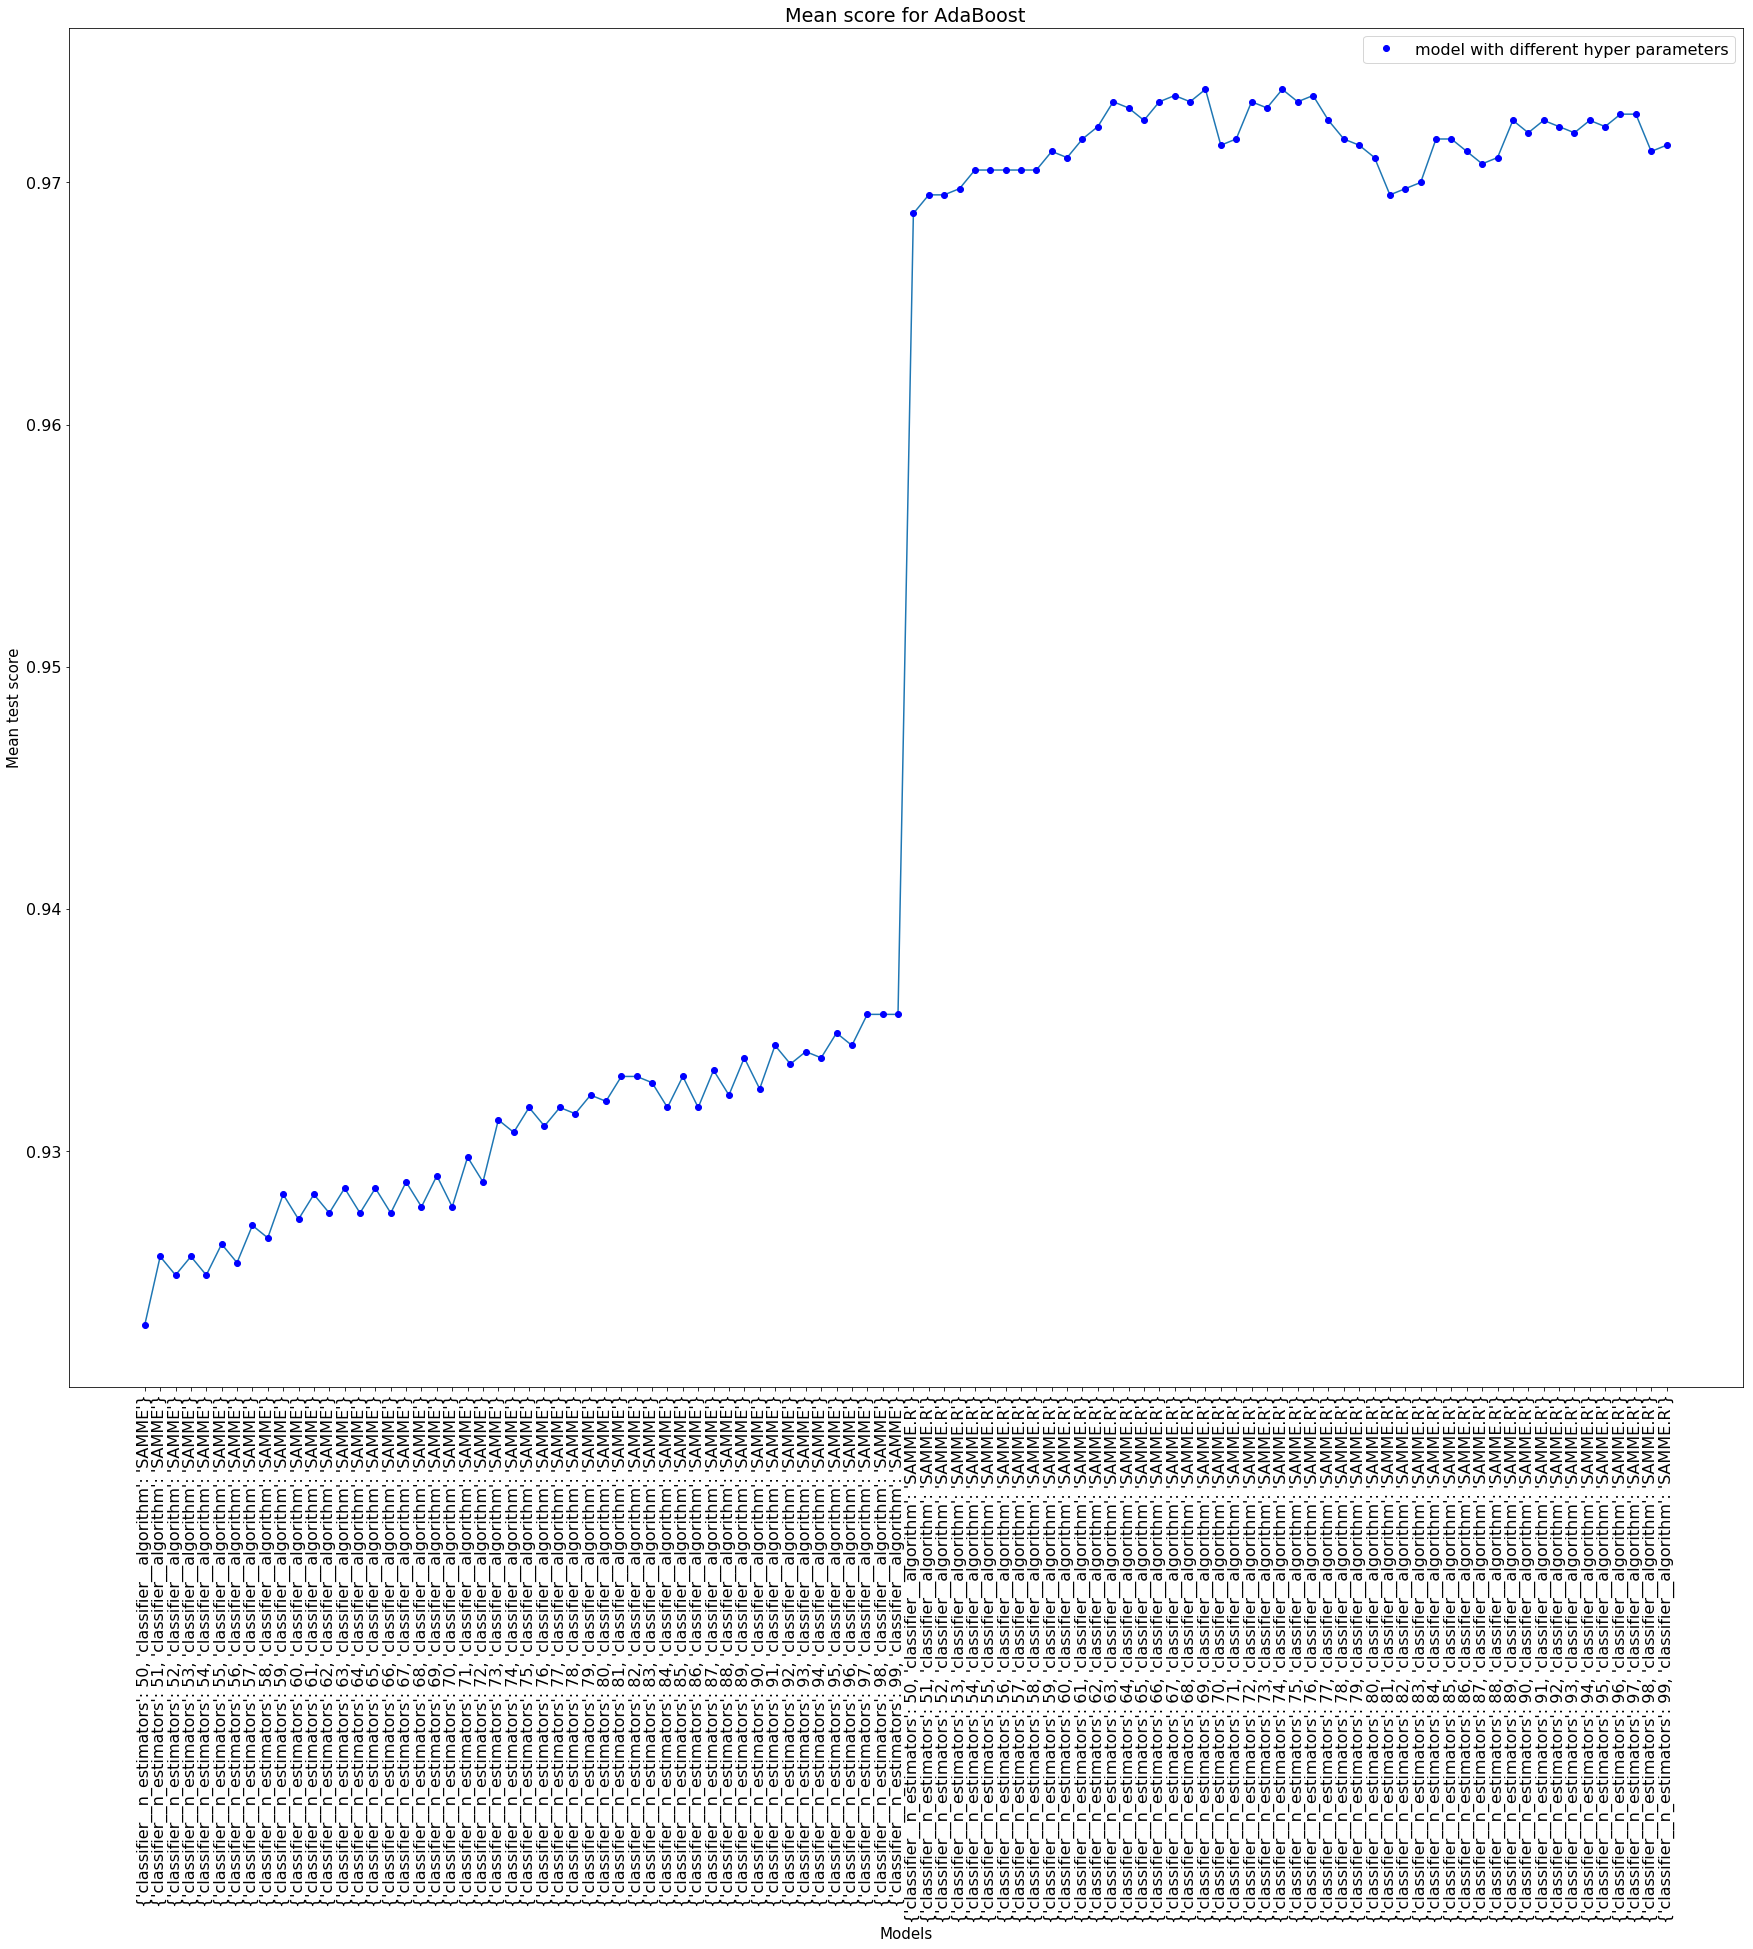

In [193]:
plt.figure(figsize = (30, 25))
plt.title("Mean score for AdaBoost")
plt.plot(modelBoosted.cv_results_["mean_test_score"])
plt.plot(modelBoosted.cv_results_["mean_test_score"], "bo", label = "model with different hyper parameters")
plt.xticks(range(0, len(modelBoosted.cv_results_['params'])), modelBoosted.cv_results_['params'], rotation = 90)

plt.xlabel('Models', fontsize = 15)
plt.ylabel('Mean test score', fontsize = 15)

plt.legend()
plt.show()

## Classification Report

In [189]:
prediction = modelBoosted.predict(xTest)
print(classification_report(yTest, prediction, target_names=["ham", "spam"]))

             precision    recall  f1-score   support

        ham       0.98      0.99      0.99      1468
       spam       0.95      0.83      0.89       204

avg / total       0.97      0.97      0.97      1672



Both SVM and AdaBoostClassifier seems to be performing good. For SVM C parameter value gives constant performanace after some value.<br>
The F1 score for both SVM and Adaboostclassifier is same. There is better recall for SVM for spam class as compared to Adaboost classifier. However Adaboost classifier is providing better recall for spam.